In [1]:
import statsmodels
import pandas as pd

In [2]:
df =pd.read_csv('data/macrodata.csv',index_col=0,parse_dates=True)

In [3]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [4]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [5]:
gdp_cycle,gdp_trend = hpfilter(df['realgdp'],lamb=1600)

<AxesSubplot:>

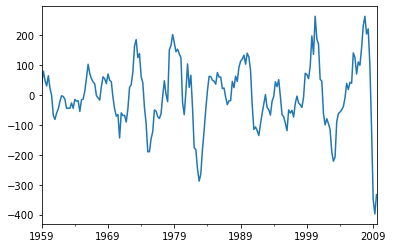

In [6]:
gdp_cycle.plot()

<AxesSubplot:>

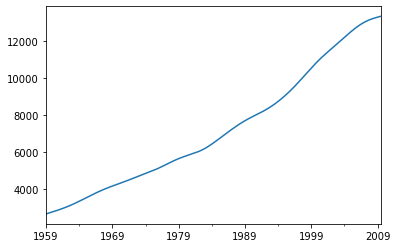

In [7]:
gdp_trend.plot()

### ETS (error-trend-seasonality) decomosition

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
results = seasonal_decompose (df['realgdp'])

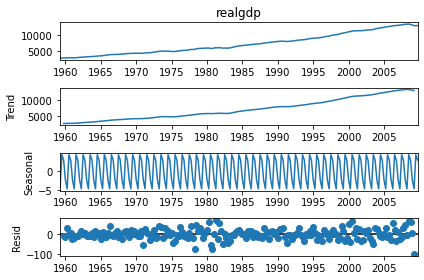

In [10]:
results.plot((10,6));

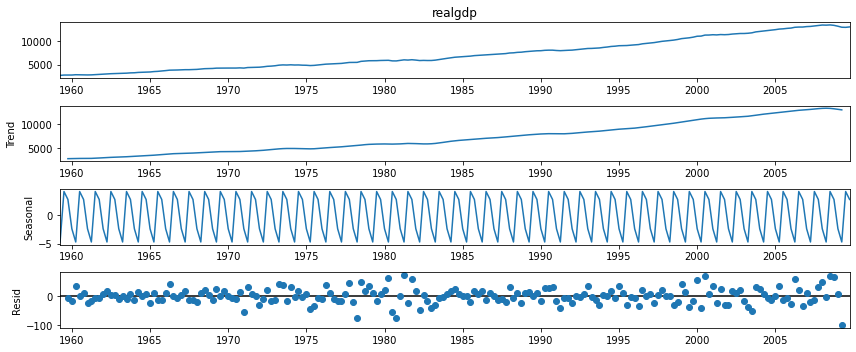

In [11]:
#plot larger p
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
results.plot();

<AxesSubplot:>

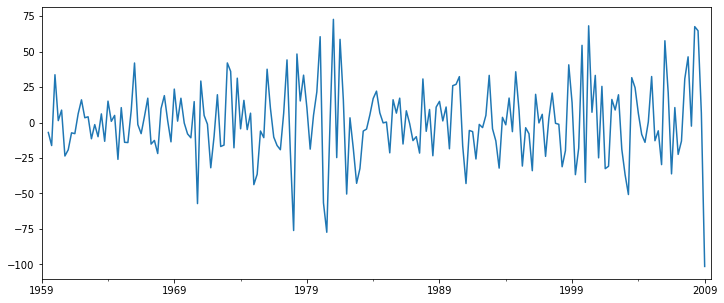

In [12]:
# second method
results.resid.plot(figsize=(12,5))

## EWMA (exponentialy weighted moving average model)

In [13]:
airline=pd.read_csv('Data/airline_passengers.csv',index_col=0,parse_dates=True)

In [14]:
airline

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [15]:
airline=airline.dropna()

In [16]:
airline['6_month_SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12_month_SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [17]:
airline['EWMA_12']=airline['Thousands of Passengers'].ewm(span = 12).mean()

<AxesSubplot:xlabel='Month'>

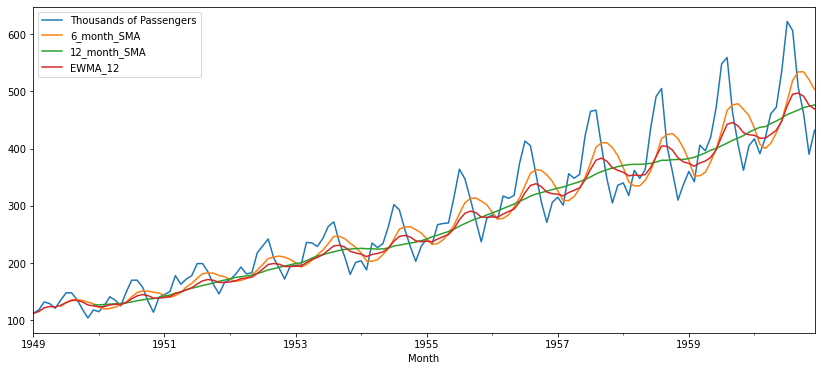

In [18]:
airline.plot(figsize=(14,6))

<AxesSubplot:xlabel='Month'>

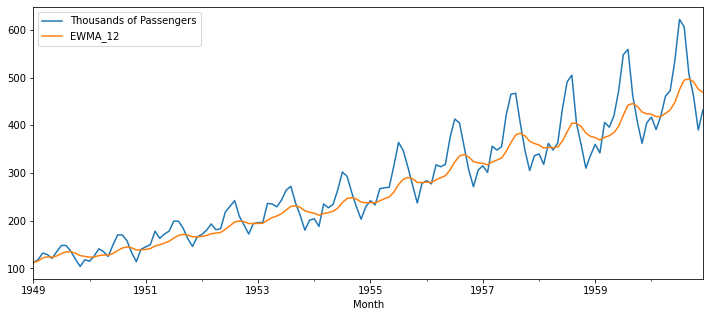

In [19]:
airline[['Thousands of Passengers','EWMA_12']].plot()

## holt winter method

In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [21]:
airline['double-exponential-smoothing-add-12']=ExponentialSmoothing(airline['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)
airline['double-exponential-smoothing-mul-12']=ExponentialSmoothing(airline['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

C:\Users\marziyeh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marziyeh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\marziyeh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

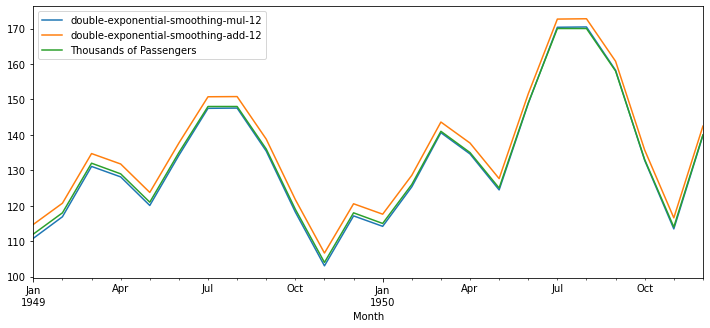

In [22]:
airline[['double-exponential-smoothing-mul-12','double-exponential-smoothing-add-12','Thousands of Passengers']].iloc[:24].plot()

In [23]:
airline['TES-mul-12']=ExponentialSmoothing(airline['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)

C:\Users\marziyeh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marziyeh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\marziyeh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:xlabel='Month'>

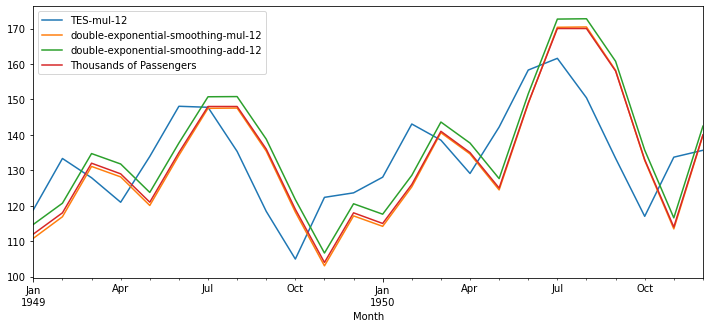

In [24]:
airline[['TES-mul-12','double-exponential-smoothing-mul-12','double-exponential-smoothing-add-12','Thousands of Passengers']].iloc[:24].plot()

## forecasting models

In [25]:
train_data = airline.iloc[:109]
test_data = airline.iloc[108:]

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [27]:
fitted_model = ExponentialSmoothing (train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\marziyeh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\marziyeh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\marziyeh\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [28]:
#predict 3 years
test_pred=fitted_model.forecast(36)

C:\Users\marziyeh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Month'>

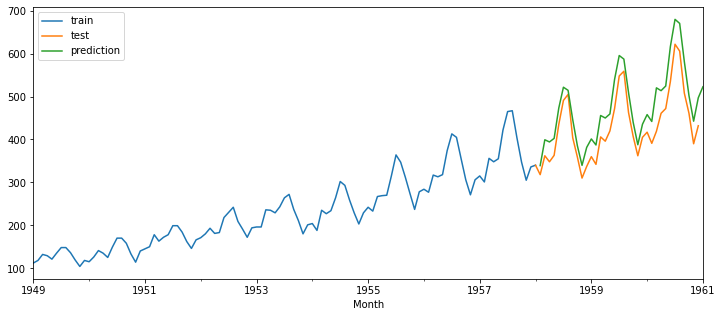

In [29]:
train_data['Thousands of Passengers'].plot(legend=True,label='train')
test_data['Thousands of Passengers'].plot(legend=True,label='test')
test_pred.plot(legend=True,label='prediction')

#### evaluation

In [30]:
import numpy as np
import sklearn
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
mae = mean_absolute_error(test_data['Thousands of Passengers'],test_pred)
mse = mean_squared_error (test_data['Thousands of Passengers'],test_pred)
rmse = np.sqrt (mse)

In [32]:
print('mean_test: %3f' %test_data['Thousands of Passengers'].mean())
print ('rmse :%3f' %rmse)

mean_test: 428.500000
rmse :74.928309


## it is clear that prediction performance is satisfactory